## This notebook is exploration of data and prototyping of parts of the pipeline. The full pipeline / finished data product is in "search grouping PIPELINE - FINAL DATA PRODUCT" file

IMPORTING DATASET AND EDA


In [11]:
#imports
! pip install geopy
from datetime import date
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import geopy.distance

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# import main data
data = pd.read_csv("./watch_sample.csv") 
data.head()

user_id                               trip_id   trip_type       origin  destination origin_type destination_type departure_date return_date  stay  weekend  filter_no_lcc  filter_non_stop  filter_short_layover         filter_name    first_searched_dt       watch_added_dt status_latest latest_status_change_dt  status_updates  total_notifs  total_buy_notifs first_rec  first_price         first_buy_dt  first_buy_price  lowest_price        last_notif_dt  forecast_first_target_price  forecast_first_good_price  forecast_last_target_price  forecast_last_good_price forecast_last_warning_date forecast_last_danger_date  forecast_min_target_price  forecast_max_target_price  forecast_min_good_price  forecast_max_good_price  first_advance  watch_advance
0  945e05e2b2510be2edb1149348fdb24852f2a6fe101e6c...  ddc5e806-226f-335d-a9f9-e59c55550832     one_way  airport/BCN  airport/EWR     airport          airport     2018-03-01         NaN   NaN        0              0                0                     0            NoFilter  2018-02-26 01:22:51  2018-02-26 01:22:59       expired     2018-03-02 03:00:00               3           1.0               1.0       buy        464.0  2018-02-26 01:22:51            464.0         464.0  2018-02-28 10:58:16                        406.0                      248.0                       491.0                     245.0                 2017-12-02                2018-01-18                      406.0                      491.0                    245.0                    248.0              3            3.0
1  2551a4e447dcae0678cbc56d6a2f8812468913d60e0ae7...  8442e619-9568-320a-85d7-a030255f2ebb  round_trip     city/QHO     city/NYC        city             city     2018-07-22  2018-07-27   5.0        0              1                1                     0  And(NonStop,NoLCC)  2018-02-20 09:27:03  2018-02-20 09:27:04      inactive     2018-02-22 22:48:15               3           0.0               0.0      wait        354.0                  NaN              NaN         354.0                  NaN                        271.0                      292.0                       271.0                     292.0                 2018-06-27                2018-07-16                      271.0                      271.0                    292.0                    292.0            152          152.0
2  369d7d4371ef4330b2d6f09110d77d7be7da83135ce24e...  1c4a1926-28cb-3701-af32-fac8017283a5  round_trip  airport/MCI     city/LYS     airport             city     2019-06-01  2019-06-30  29.0        0              0                0                     0            NoFilter  2018-09-24 17:54:38                  NaN       shopped     2018-09-24 17:54:38               1           0.0               0.0      wait       1735.0                  NaN              NaN        1735.0                  NaN                       1067.0                     1048.0                      1067.0                    1048.0                 2018-12-29                2019-03-04                     1067.0                     1067.0                   1048.0                   1048.0            250            NaN
3  591e76b08791fed2732f7b066a45fbb5194d2146e8f9f7...  cf566556-ae31-38e7-94f4-0fabf21be177  round_trip  airport/SFO  airport/LAS     airport          airport     2018-02-02  2018-02-05   3.0        1              1                1                     0  And(NonStop,NoLCC)  2018-01-12 19:49:01  2018-01-12 19:49:02      inactive     2018-01-12 19:49:30               3           0.0               0.0      wait        188.0                  NaN              NaN         188.0                  NaN                        135.0                      117.0                       135.0                     117.0                 2018-01-08                2018-01-27                      135.0                      135.0                    117.0                    117.0             21           21.0
4  616c2878a69a81f525ddb5ba23459c56a6f6065c7b9bbb...  8bf4507a-99c4-3b

In [2]:
# airports dataset
data2 = pd.read_csv("./airports.csv") 
data2.head()

location_id location_type airport_group country_code           country              region   latitude   longitude
0    airport/0       airport     airport/0           BR            Brazil       South America -29.153099  -53.743301
1  airport/AAA       airport   airport/AAA           FR  French Polynesia             Oceania -17.352600 -145.509995
2  airport/AAB       airport   airport/AAB           AU         Australia             Oceania -26.700001  141.050003
3  airport/AAC       airport   airport/AAC           EG             Egypt  Africa and Mideast  31.073299   33.835800
4  airport/AAE       airport   airport/AAE           DZ           Algeria  Africa and Mideast  36.822201    7.809170

In [39]:
data.describe()

stay       weekend  filter_no_lcc  filter_non_stop  filter_short_layover  status_updates  total_notifs  total_buy_notifs   first_price  first_buy_price  lowest_price  forecast_first_target_price  forecast_first_good_price  forecast_last_target_price  forecast_last_good_price  forecast_min_target_price  forecast_max_target_price  forecast_min_good_price  forecast_max_good_price  first_advance  watch_advance
count  950170.000000  1.168145e+06   1.168145e+06     1.168145e+06          1.168145e+06    1.168145e+06  1.164222e+06      1.164222e+06  1.164222e+06    780347.000000  1.164222e+06                 1.147823e+06               1.147823e+06                1.152733e+06              1.152733e+06               1.152973e+06               1.152973e+06             1.152973e+06             1.152973e+06   1.168145e+06  366406.000000
mean        8.625136  1.993074e-01   2.255542e-02     9.479731e-02          2.647617e-02    1.793653e+00  3.508029e+00      2.115549e+00  4.701233e+02       450.573783  4.532634e+02                 1.647459e+03               3.799803e+02                1.629609e+03              3.792452e+02              -1.487073e+03               3.973364e+03             3.775608e+02             3.817770e+02   8.268861e+01      97.469487
std        14.373609  3.994798e-01   1.484813e-01     2.929349e-01          1.605466e-01    1.357241e+00  8.960595e+00      5.794864e+00  3.915969e+02       361.820342  3.814149e+02                 1.275664e+06               2.902475e+02                2.710577e+06              2.893393e+02               2.321246e+06               2.298515e+06             2.880439e+02             2.916458e+02   7.176089e+01      73.190726
min         0.000000  0.000000e+00   0.000000e+00     0.000000e+00          0.000000e+00    1.000000e+00  0.000000e+00      0.000000e+00  6.000000e+00         6.000000  4.000000e+00                 1.000000e+00               1.300000e+01               -1.144080e+09              1.300000e+01              -1.341970e+09               1.000000e+00             1.300000e+01             1.300000e+01   0.000000e+00       0.000000
25%         3.000000  0.000000e+00   0.000000e+00     0.000000e+00          0.000000e+00    1.000000e+00  0.000000e+00      0.000000e+00  2.250000e+02       215.000000  2.130000e+02                 2.020000e+02               1.750000e+02                2.190000e+02              1.750000e+02               1.970000e+02               2.230000e+02             1.740000e+02             1.760000e+02   2.700000e+01      40.000000
50%         5.000000  0.000000e+00   0.000000e+00     0.000000e+00          0.000000e+00    1.000000e+00  0.000000e+00      0.000000e+00  3.610000e+02       349.000000  3.460000e+02                 3.330000e+02               2.920000e+02                3.680000e+02              2.920000e+02               3.260000e+02               3.740000e+02             2.910000e+02             2.940000e+02   6.200000e+01      79.000000
75%         9.000000  0.000000e+00   0.000000e+00     0.000000e+00          0.000000e+00    3.000000e+00  0.000000e+00      0.000000e+00  6.000000e+02       581.000000  5.800000e+02                 5.690000e+02               5.020000e+02                6.250000e+02              5.010000e+02               5.580000e+02               6.370000e+02             4.990000e+02             5.040000e+02   1.200000e+02     139.000000
max       351.000000  1.000000e+00   1.000000e+00     1.000000e+00          1.000000e+00    1.970000e+02  1.830000e+02      1.560000e+02  1.748200e+04     16434.000000  1.748200e+04                 1.366604e+09               9.117000e+03                1.883577e+09              9.117000e+03               1.366604e+09               1.960021e+09             9.117000e+03             9.117000e+03   3.580000e+02     358.000000

In [1]:
# look at variables
# data.dtypes

In [42]:
# look at number of unique values
# ps see slightly fewer trip_ids than total rows -- means repeat trip_ids --> an issue to potentially address later!!!
data.nunique()

user_id                          75000
trip_id                        1116410
trip_type                            2
origin                            1341
destination                       1630
origin_type                          2
destination_type                     2
departure_date                     786
return_date                        792
stay                               333
weekend                              2
filter_no_lcc                        2
filter_non_stop                      2
filter_short_layover                 2
filter_name                          6
first_searched_dt              1139441
watch_added_dt                  363544
status_latest                        5
latest_status_change_dt         983242
status_updates                      55
total_notifs                       131
total_buy_notifs                   117
first_rec                            2
first_price                       4004
first_buy_dt                    767724
first_buy_price          

In [43]:
# nonunique - duplicate trip_id
len(data)

1168145

In [44]:
# see that there are multiple user entries per user
data.groupby('user_id').agg({'user_id': {'count': 'count'}}).head()


/Users/Don/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


user_id
                                                     count
user_id                                                   
0001ca3152611b9c7ead6bf33fe6279cd80059efa64441b...       6
0003417097ef37b45bdd155b2aac72f876f80749a89c052...       2
00045f806866b778aa6222fbfe8280a9a510b3ffe939aca...       3
0005050da7f3ee662a8ea21856d9556621fd61f8a2a1f6d...       1
00088669cc5838368a538c649658d9765f9a0ad8e2991e4...       1

so, we see multiple trips per user_id often. 

Also, problematically, there are repeat trip_ids --> is it a data issue?



ps: Let's zoom in on one user and his/her trips


In [46]:
data[data['user_id']=='000e715d0f69d265f7f9384e232b035c3d5608e6175ec365b307516e0bb562f1']

user_id                               trip_id   trip_type       origin  destination origin_type destination_type departure_date return_date  stay  weekend  filter_no_lcc  filter_non_stop  filter_short_layover filter_name    first_searched_dt       watch_added_dt status_latest latest_status_change_dt  status_updates  total_notifs  total_buy_notifs first_rec  first_price         first_buy_dt  first_buy_price  lowest_price        last_notif_dt  forecast_first_target_price  forecast_first_good_price  forecast_last_target_price  forecast_last_good_price forecast_last_warning_date forecast_last_danger_date  forecast_min_target_price  forecast_max_target_price  forecast_min_good_price  forecast_max_good_price  first_advance  watch_advance
17176    000e715d0f69d265f7f9384e232b035c3d5608e6175ec3...  6c2123c2-d546-3f23-95c4-ee99ca1d82e4  round_trip  airport/FWA  airport/LAX     airport          airport     2018-05-03  2018-05-09   6.0        0              0                0                     0    NoFilter  2018-02-15 21:05:54                  NaN       shopped     2018-02-15 21:05:54               1           0.0               0.0      wait        360.0                  NaN              NaN         360.0                  NaN                        328.0                      313.0                       328.0                     313.0                 2018-02-06                2018-04-20                      328.0                      328.0                    313.0                    313.0             77            NaN
21297    000e715d0f69d265f7f9384e232b035c3d5608e6175ec3...  f6dc6efa-70c4-3a03-8dce-6ab9da7a066d  round_trip  airport/LAX  airport/FWA     airport          airport     2018-08-17  2018-08-19   2.0        1              0                0                     0    NoFilter  2018-06-23 16:03:55                  NaN       shopped     2018-06-23 16:03:55               1           0.0               0.0      wait        495.0                  NaN              NaN         495.0                  NaN                        401.0                      358.0                       401.0                     358.0                 2018-07-07                2018-08-09                      401.0                      401.0                    358.0                    358.0             55            NaN
61787    000e715d0f69d265f7f9384e232b035c3d5608e6175ec3...  49f10918-f4af-3176-bc15-8281dce1c86f  round_trip  airport/LAX  airport/IND     airport          airport     2018-11-21  2018-11-25   4.0        0              0                0                     0    NoFilter  2018-06-11 09:19:48  2018-06-11 09:19:51       expired     2018-11-22 03:00:00               3          44.0              24.0      wait        500.0  2018-09-17 14:27:00            641.0         493.0  2018-11-21 11:49:33                        431.0                      377.0                       996.0                     419.0                 2018-09-15                2018-11-04                      428.0                     1088.0                    377.0                    419.0            163          163.0
85945    000e715d0f69d265f7f9384e232b035c3d5608e6175ec3...  843d6ce6-85ec-3fe8-864d-42ce4a426b3f  round_trip  airport/FWA  airport/ONT     airport          airport     2018-06-17  2018-06-19   2.0        0              0                0                     0    NoFilter  2018-06-13 19:43:26                  NaN       shopped     2018-06-13 19:43:26               1           0.0               0.0       buy       1213.0  2018-06-13 19:43:26           1213.0        1213.0                  NaN                       1003.0                      491.0                      1003.0                     491.0                 2018-04-05                2018-05-28                     1003.0                     1003.0                    491.0                    491.0              4            NaN
115162   000e715d0f69d265f7f9384e232b035c3d5608e6175ec3...  5602e1ca-3e7f-330d-be02-39

DATA PROCESSING -----------

I want to preprocess airports tabe to make sure I can join it in twice to trips table:
    
    1. Once for origin location
    2. Once for destination location
    
So, I create differnt name post-fixes to identify origin from destination

In [3]:
# LIST OF COLUMNS OF AIRPORTS DATASET
array = ['location_id', 'location_type', 'airport_group', 'country_code',
       'country', 'region', 'latitude', 'longitude']

# set up origin and destination alternations
array_origin = [item + '_origin' for item in array]
array_destination = [item + '_destination' for item in array]


# Rename origin airports table version
rename_origin = {}

for a, b in zip(array, array_origin):
    rename_origin.update({a:b})
    
# rename destination airports table version
rename_destination = {}

for a, b in zip(array, array_destination):
    rename_destination.update({a:b})
    

# renaming columns of origin and destination
airports_origin = data2.rename(columns=rename_origin)
airports_destination = data2.rename(columns=rename_destination)

airports_origin





location_id_origin location_type_origin airport_group_origin country_code_origin                                 country_origin               region_origin  latitude_origin  longitude_origin
0             airport/0              airport            airport/0                  BR                                         Brazil               South America       -29.153099        -53.743301
1           airport/AAA              airport          airport/AAA                  FR                               French Polynesia                     Oceania       -17.352600       -145.509995
2           airport/AAB              airport          airport/AAB                  AU                                      Australia                     Oceania       -26.700001        141.050003
3           airport/AAC              airport          airport/AAC                  EG                                          Egypt          Africa and Mideast        31.073299         33.835800
4           airport/AAE              airport          airport/AAE                  DZ                                        Algeria          Africa and Mideast        36.822201          7.809170
5           airport/AAF              airport          airport/AAF                  US                                  United States               United States        29.727501        -85.027496
6           airport/AAG              airport          airport/AAG                  BR                                         Brazil               South America       -24.103901        -49.789101
7           airport/AAH              airport          airport/AAH                  DE                                        Germany                      Europe        50.823055          6.186389
8           airport/AAI              airport          airport/AAI                  BR                                         Brazil               South America       -13.023889        -46.885555
9           airport/AAJ              airport          airport/AAJ                  GF                                       Suriname               South America         3.898681        -55.577907
10          airport/AAK              airport          airport/AAK                  FR                                       Kiribati                     Oceania         0.185278        173.636993
11          airport/AAL              airport          airport/AAL                  DK                                        Denmark                      Europe        57.092759          9.849243
12          airport/AAM              airport          airport/AAM                  ZA                                   South Africa          Africa and Mideast       -24.818100         31.544600
13          airport/AAN              airport          airport/AAN                  AE                           United Arab Emirates          Africa and Mideast        24.261700         55.609200
14          airport/AAO              airport          airport/AAO                  VE                                      Venezuela               South America         9.430225        -64.470726
15          airport/AAQ              airport          airport/AAQ                  RU                                         Russia                      Russia        45.002102         37.347301
16          airport/AAR              airport          airport/AAR                  DK                                        Denmark                      Europe        56.299999         10.619000
17          airport/AAS              airport          airport/AAS                 NaN                                            NaN                        1xld        -3.883200        139.310800
18          airport/AAT              airport          airport/AAT                  CN                                          China                        Asia        47.749886         88.085808
19          airport/AAU              airport          airport/AAU                  FR

##### JOIN IN DEPARTURE AND DESTINATION - NOW EACH TRIP CAN BE GROUPED BY REGION, COUNTRY!

In [6]:
# join the 2 dataframes
joined = pd.merge(data, airports_origin, how='left', left_on=['origin'], right_on=['location_id_origin']) \
           .merge(airports_destination, how='left', left_on=['destination'], right_on=['location_id_destination'])

joined.head()

user_id                               trip_id   trip_type       origin  destination origin_type destination_type departure_date return_date  stay  weekend  filter_no_lcc  filter_non_stop  filter_short_layover         filter_name    first_searched_dt       watch_added_dt status_latest latest_status_change_dt  status_updates  total_notifs  total_buy_notifs first_rec  first_price         first_buy_dt  first_buy_price  lowest_price        last_notif_dt  forecast_first_target_price  forecast_first_good_price  forecast_last_target_price  forecast_last_good_price forecast_last_warning_date forecast_last_danger_date  forecast_min_target_price  forecast_max_target_price  forecast_min_good_price  forecast_max_good_price  first_advance  watch_advance location_id_origin location_type_origin airport_group_origin country_code_origin country_origin               region_origin  latitude_origin  longitude_origin location_id_destination location_type_destination airport_group_destination country_code_destination country_destination region_destination  latitude_destination  longitude_destination
0  945e05e2b2510be2edb1149348fdb24852f2a6fe101e6c...  ddc5e806-226f-335d-a9f9-e59c55550832     one_way  airport/BCN  airport/EWR     airport          airport     2018-03-01         NaN   NaN        0              0                0                     0            NoFilter  2018-02-26 01:22:51  2018-02-26 01:22:59       expired     2018-03-02 03:00:00               3           1.0               1.0       buy        464.0  2018-02-26 01:22:51            464.0         464.0  2018-02-28 10:58:16                        406.0                      248.0                       491.0                     245.0                 2017-12-02                2018-01-18                      406.0                      491.0                    245.0                    248.0              3            3.0        airport/BCN              airport          airport/BCN                  ES          Spain                      Europe        41.297100          2.078460             airport/EWR                   airport                  city/NYC                       US       United States      United States             40.692501             -74.168701
1  2551a4e447dcae0678cbc56d6a2f8812468913d60e0ae7...  8442e619-9568-320a-85d7-a030255f2ebb  round_trip     city/QHO     city/NYC        city             city     2018-07-22  2018-07-27   5.0        0              1                1                     0  And(NonStop,NoLCC)  2018-02-20 09:27:03  2018-02-20 09:27:04      inactive     2018-02-22 22:48:15               3           0.0               0.0      wait        354.0                  NaN              NaN         354.0                  NaN                        271.0                      292.0                       271.0                     292.0                 2018-06-27                2018-07-16                      271.0                      271.0                    292.0                    292.0            152          152.0           city/QHO                 city             city/QHO                  US  United States               United States        29.814899        -95.310150                city/NYC                      city                  city/NYC                       US       United States      United States             40.703167             -73.940066
2  369d7d4371ef4330b2d6f09110d77d7be7da83135ce24e...  1c4a1926-28cb-3701-af32-fac8017283a5  round_trip  airport/MCI     city/LYS     airport             city     2019-06-01  2019-06-30  29.0        0              0                0                     0            NoFilter  2018-09-24 17:54:38                  NaN       shopped     2018-09-24 17:54:38               1           0.0               0.0      wait       1735.0                  NaN              NaN        1735.0                  NaN                       1067.0                     1048.0                      1067.0                    1048.0                 2018

SO, NOW I CAN GROUP ALL TRIPS BY COUNTRY AND REGION.

### NOW I WANT TO GROUP BY PRICING BANDS. CHEAP TRIPS? vs EXPENSIVE TRIPS?

I establish price tiers using a function I constructed below. The function takes in a df, number of bands / tiers (ie bands of equal percentiles i want a variable grouped by)

In [7]:
# the function the allows me to create bands - I will reuse this function
def banding(df, categories, colName):
    
    # create quantiles
    spend_quartiles = pd.qcut(df[colName], q=categories-1, labels=range(1,categories))

    return spend_quartiles
    

In [8]:
# Now I iterate all prices to build out bands of interest - larger numbers belong to larger bands!

df = joined[['forecast_first_target_price', 'forecast_first_good_price', 'forecast_last_target_price', \
             'forecast_last_good_price', 'forecast_last_warning_date', 'forecast_last_danger_date', \
             'forecast_min_target_price', 'forecast_max_target_price', 'forecast_min_good_price', \
             'forecast_max_good_price']].head()

dictionary = {'forecast_first_target_price':5, 'forecast_first_good_price':5, 'forecast_last_target_price':5, \
             'forecast_last_good_price':5, 'forecast_last_warning_date':5, 'forecast_last_danger_date':5, \
             'forecast_min_target_price':5, 'forecast_max_target_price':5, 'forecast_min_good_price':5, \
             'forecast_max_good_price':5}

# iteration
for key, value in dictionary.items():
    
    df[key + '_tier'] = banding(df=df, categories=value, colName=key)
    
    
df.head()

forecast_first_target_price  forecast_first_good_price  forecast_last_target_price  forecast_last_good_price forecast_last_warning_date forecast_last_danger_date  forecast_min_target_price  forecast_max_target_price  forecast_min_good_price  forecast_max_good_price forecast_first_target_price_tier forecast_first_good_price_tier forecast_last_target_price_tier forecast_last_good_price_tier forecast_last_warning_date_tier forecast_last_danger_date_tier forecast_min_target_price_tier forecast_max_target_price_tier forecast_min_good_price_tier forecast_max_good_price_tier
0                        406.0                      248.0                       491.0                     245.0                 2017-12-02                2018-01-18                      406.0                      491.0                    245.0                    248.0                                2                              1                               3                             1                               1                              1                              2                              3                            1                            1
1                        271.0                      292.0                       271.0                     292.0                 2018-06-27                2018-07-16                      271.0                      271.0                    292.0                    292.0                                1                              2                               1                             2                               3                              2                              1                              1                            2                            2
2                       1067.0                     1048.0                      1067.0                    1048.0                 2018-12-29                2019-03-04                     1067.0                     1067.0                   1048.0                   1048.0                                4                              4                               4                             4                               4                              4                              4                              4                            4                            4
3                        135.0                      117.0                       135.0                     117.0                 2018-01-08                2018-01-27                      135.0                      135.0                    117.0                    117.0                                1                              1                               1                             1                               1                              1                              1                              1                            1                            1
4                        457.0                      394.0                       411.0                     393.0                 2018-05-26                2018-09-06                      411.0                      463.0                    393.0                    394.0                                3                              3                               2                             3                               2                              3                              3                              2                            3                            3

### LET'S ALSO GROUP TRIPS BY LATITUDE OF DESTINATION.

LATITUDE IS WHAT DECIDES CLIMATE ZONE. SO, A TRIP TO MEXICO, ACAPULCO AND ATHENS IN GREECE ARE TECHNICALLY SIMILAR TRIPS BECAUSE THE CLIMATE ZONE IS SIMILAR (WARM!). THIS KIND OF RECOMMENDATION TRANSCENDS SIMPLE REGION / COUNTRY GROUPING AND HELPS IDENTIFY NOVEL TRIPS WE CAN RECOMMEND TO A USER.

HERE IS HOW I CREATED BANDS FOR LATITUDE AND LONGITUDE https://scijinks.gov/climate-zones/

I LOOKED AT CLIMATE ZONES, AND IF YOUR DESTINATION IS IN BETWEEN LONGITUDE 0 TO 30 OR 0 AND -30 THEN YOU ARE A TROPICAL DESTINATION, 30 TO 60 AND -30 TO -60 IS CONTINENTAL ETC

In [286]:
# group -- o to 30 is tropical, 30 to 60 is continental, else is polar

# df is placeholder. remove it later
df = joined[['latitude_destination']]


# set up conditionals for latitude bands
conditions = [
    (df['latitude_destination'] > 0) & (df['latitude_destination'] <= 30),
    (df['latitude_destination'] < 0) & (df['latitude_destination'] >= -30),
    (df['latitude_destination'] > 30) & (df['latitude_destination'] <= 60),
    (df['latitude_destination'] < -30) & (df['latitude_destination'] >= -60),
    (df['latitude_destination'] > 60),
    (df['latitude_destination'] < -60)]


choices = ['tropical', 'tropical', 'continental', 'continental', 'polar', 'polar']

# apply the choices
df['climate'] = np.select(conditions, choices, default='black')

df.head()



/Users/Don/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


latitude_destination      climate
0             40.692501  continental
1             40.703167  continental
2             45.605499  continental
3             36.080101  continental
4             40.639801  continental

In [110]:
# check out some of them
df[df['climate']=='tropical'].head()

latitude_destination   climate
5              26.072599  tropical
8              20.680099  tropical
9              26.072599  tropical
12             25.778500  tropical
13             12.004200  tropical

### NOW ADD DATE GROUPINGS --> MONTH-YEAR, MONTH

In [287]:
# SAMPLE DF
df = joined[['departure_date']]


# EXTRACT MONTH_YEAR
df['month_year'] = df['departure_date'].astype(str).str[0:7]

#EXTRACT MONTH
df['month'] = df['departure_date'].astype(str).str[5:7]

df.head()

/Users/Don/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Don/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


departure_date month_year month
0     2018-03-01    2018-03    03
1     2018-07-22    2018-07    07
2     2019-06-01    2019-06    06
3     2018-02-02    2018-02    02
4     2018-09-27    2018-09    09

### Also can group trips based on the distance of a trip.

For that, we will use lat and long of destination and arrival to calculate distance betweeen the two locations.


In [34]:
! pip install geopy

import geopy.distance


# df test
df = joined[['latitude_origin', 'longitude_origin', 'latitude_destination', 'longitude_destination']].head()


# pass the row in --> distance calculation
def distance(df):
    
    coords_1 = (df['latitude_origin'], df['longitude_origin'])
    coords_2 = (df['latitude_destination'], df['longitude_destination'])
    return geopy.distance.vincenty(coords_1, coords_2).km


# pass row in - get the calculation of distance
distances = df.apply(distance, axis=1).head()

#join in to original df on indeces
df['distances'] = distances

#now do banding of distances
df['distances_tier'] = banding(df, 5, colName='distances')


df.head()



/Users/Don/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  from ipykernel import kernelapp as app


latitude_origin  longitude_origin  latitude_destination  longitude_destination    distances distances_tier
0        41.297100          2.078460             40.692501             -74.168701  6192.378833              3
1        29.814899        -95.310150             40.703167             -73.940066  2279.855735              1
2        39.297600        -94.713898             45.605499               5.121490  7680.577477              4
3        37.618999       -122.375000             36.080101            -115.152000   666.249783              1
4         9.993860        -84.208801             40.639801             -73.778900  3547.753921              2

## Before we do clustering, let's run all the groupings in a pipeline



In [13]:

# class which encapsulates helper functions used by pipeline class
class helperFunctions(object):
    
    def group_region_country(self, trips, airport):
        
        """
        This function joins in the trips and airport dataframes 
        in order to enable grouping by region and country. Used by child class.
        
        """
        
        
        # LIST OF COLUMNS OF AIRPORTS DATASET
        array = ['location_id', 'location_type', 'airport_group', 'country_code',
               'country', 'region', 'latitude', 'longitude']

        # set up origin and destination alternations
        array_origin = [item + '_origin' for item in array]
        array_destination = [item + '_destination' for item in array]


        # Rename origin airports table version
        rename_origin = {}

        for a, b in zip(array, array_origin):
            rename_origin.update({a:b})

        # rename destination airports table version
        rename_destination = {}

        for a, b in zip(array, array_destination):
            rename_destination.update({a:b})

        
        # renaming columns of origin and destination
        airports_origin = airport.rename(columns=rename_origin)
        airports_destination = airport.rename(columns=rename_destination)
        

        # join the 2 dataframes
        joined = pd.merge(trips, airports_origin, how='left', left_on=['origin'], right_on=['location_id_origin']) \
                   .merge(airports_destination, how='left', left_on=['destination'], right_on=['location_id_destination'])

        
        return joined
    
    
    
    
    
    
    # the function that allows me to create bands
    def banding(self, df, categories, colName):
        
        """
        This function groups a column in dataframe df by a certain number of categories
        into percentile cuts
        
        """
    
        # create quartiles (automatic naming depending on size of quartile)
        tiers = pd.qcut(df[colName], q=categories-1, labels=range(1,categories))

        return tiers
    
    
    

    # pass the row in --> distance calculation
    def distance(self, df):
        
        """
        This function calculates distance between two points on a dataframe
        
        """

       
        coords_1 = (df['latitude_origin'], df['longitude_origin'])
        coords_2 = (df['latitude_destination'], df['longitude_destination'])

        return geopy.distance.vincenty(coords_1, coords_2).km


    
    

# class is initializing a dataframe 1 and dataframe 2
class pipeline(helperFunctions):
    
    # add a date of when all was scored
    def __init__(self, trips, airport, date):
        self.trips = trips.dropna()    
        self.airport = airport 
        self.date = date
    
        # initial join pre-processing
        # joined is necessary for most downstram stuff - gets me country groupings
        self.joined = super().group_region_country(self.trips, self.airport)
        #print(self.joined.head())
        
        self.accumulator = self.joined


        
    
    def group_price_bands(self):


        """
        This function groups various price columns into percentile tiers
        
        """
        
        dictionary = {'forecast_first_target_price':5, 'forecast_first_good_price':5, 'forecast_last_target_price':5, \
                     'forecast_last_good_price':5, 'forecast_min_target_price':5, 'forecast_max_target_price':5, \
                      'forecast_min_good_price':5, 'forecast_max_good_price':5}

        # iteration which changes the accumulator var (already initialized in class)
        for key, value in dictionary.items():

        
            self.accumulator[key + '_tier'] = super().banding(df=self.accumulator, categories=value, colName=key)


        return self.accumulator

    
    
    def group_distance_bands(self):
        
        """
        This function first calculates distances between destination and origin
        and then groups distances into tiers / bands
        
        """
        
        distances = self.accumulator.apply(super().distance, axis=1)

        #join in to original df on indeces
        self.accumulator['distances'] = distances

        #now do banding of distances
        self.accumulator['distances_tier'] = super().banding(df=self.accumulator, categories=5, colName='distances')
     
        return self.accumulator
    

    

    def group_latitudes(self):
                

        """
        This function destination latitudes into climate zones. 0 to +/-30 is tropical, 
        +-30 to +-60 is continental, else is polar
        
        """


        # set up conditionals for latitude bands
        conditions = [
            (self.accumulator['latitude_destination'] > 0) & (self.accumulator['latitude_destination'] <= 30),
            (self.accumulator['latitude_destination'] < 0) & (self.accumulator['latitude_destination'] >= -30),
            (self.accumulator['latitude_destination'] > 30) & (self.accumulator['latitude_destination'] <= 60),
            (self.accumulator['latitude_destination'] < -30) & (self.accumulator['latitude_destination'] >= -60),
            (self.accumulator['latitude_destination'] > 60),
            (self.accumulator['latitude_destination'] < -60)]


        choices = ['tropical', 'tropical', 'continental', 'continental', 'polar', 'polar']

        
     
        # apply the choices
        self.accumulator['climate_destination'] = np.select(conditions, choices, default='black')

      
        return self.accumulator

    
    
    def group_dates(self):
        
        """
        This function groups dates
        
        """
        
        
        
        # REPEAT THIS FOR MULTIPLED DATES - DEPARTURE DATE AND RETURN DATE
        # EXTRACT MONTH_YEAR
        self.accumulator['month_year'] = self.accumulator['departure_date'].astype(str).str[0:7]

        #EXTRACT MONTH
        self.accumulator['month'] = self.accumulator['departure_date'].astype(str).str[5:7]

        return self.accumulator
    

    
    
    

HERE WE RUN THE PIPELINE

In [14]:
from datetime import date


today = date.today().strftime("%Y-%m-%d")


# import data
trips = data #pd.read_csv("./watch_sample.csv") 
airports = data2 #pd.read_csv("./airports.csv") 

# just chain the methods
pipe = pipeline(trips, airports, today)
pipe.group_price_bands()
pipe.group_dates()
pipe.group_latitudes()
pipe.group_distance_bands()
pipeline_result = pipe.accumulator
pipeline_result.head()

/Users/Don/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.


user_id                               trip_id   trip_type       origin  destination origin_type destination_type departure_date return_date  stay  weekend  filter_no_lcc  filter_non_stop  filter_short_layover   filter_name    first_searched_dt       watch_added_dt status_latest latest_status_change_dt  status_updates  total_notifs  total_buy_notifs first_rec  first_price         first_buy_dt  first_buy_price  lowest_price        last_notif_dt  forecast_first_target_price  forecast_first_good_price  forecast_last_target_price  forecast_last_good_price forecast_last_warning_date forecast_last_danger_date  forecast_min_target_price  forecast_max_target_price  forecast_min_good_price  forecast_max_good_price  first_advance  watch_advance location_id_origin location_type_origin airport_group_origin country_code_origin country_origin               region_origin  latitude_origin  longitude_origin location_id_destination location_type_destination airport_group_destination country_code_destination country_destination          region_destination  latitude_destination  longitude_destination forecast_first_target_price_tier forecast_first_good_price_tier forecast_last_target_price_tier forecast_last_good_price_tier forecast_min_target_price_tier forecast_max_target_price_tier forecast_min_good_price_tier forecast_max_good_price_tier month_year month climate_destination    distances distances_tier
0  616c2878a69a81f525ddb5ba23459c56a6f6065c7b9bbb...  8bf4507a-99c4-3b45-9e17-ab7793a1ebb9  round_trip  airport/SJO  airport/JFK     airport          airport     2018-09-27  2018-10-04   7.0        0              0                0                     1  ShortLayover  2018-05-09 13:09:04  2018-05-09 13:09:05      inactive     2018-05-25 18:25:53               5           2.0               1.0      wait        488.0  2018-05-16 14:50:35            416.0         392.0  2018-05-20 03:35:22                        457.0                      394.0                       411.0                     393.0                 2018-05-26                2018-09-06                      411.0                      463.0                    393.0                    394.0            141          141.0        airport/SJO              airport             city/SJO                  CR     Costa Rica  Mexico and Central America         9.993860        -84.208801             airport/JFK                   airport                  city/NYC                       US       United States               United States             40.639801             -73.778900                                3                              3                               2                             3                              3                              2                            3                            3    2018-09    09         continental  3547.753921              3
1  117eb4bde001046b792801d47c793f816bfe16c780962f...  70929787-204d-3660-a6f1-c86b54bfc3a8  round_trip  airport/LAX  airport/FLL     airport          airport     2018-06-20  2018-06-26   6.0        0              0                0                     0      NoFilter  2018-05-09 12:19:38  2018-05-09 12:19:59      inactive     2018-05-26 23:40:59               3           5.0               4.0      wait        324.0  2018-05-14 21:21:14            322.0         274.0  2018-05-22 13:40:19                        301.0                      275.0                       291.0                     275.0                 2018-05-26                2018-06-12                      279.0                      310.0                    275.0                    275.0             42           42.0        airport/LAX              airport          airport/LAX                  US  United States               United States        33.942501       -118.407997             airport/FLL                   airport               airport/FLL                       US       United States               United States             26.072599             -80.1527

In [15]:
pipeline_result.columns

Index(['user_id', 'trip_id', 'trip_type', 'origin', 'destination',
       'origin_type', 'destination_type', 'departure_date', 'return_date',
       'stay', 'weekend', 'filter_no_lcc', 'filter_non_stop',
       'filter_short_layover', 'filter_name', 'first_searched_dt',
       'watch_added_dt', 'status_latest', 'latest_status_change_dt',
       'status_updates', 'total_notifs', 'total_buy_notifs', 'first_rec',
       'first_price', 'first_buy_dt', 'first_buy_price', 'lowest_price',
       'last_notif_dt', 'forecast_first_target_price',
       'forecast_first_good_price', 'forecast_last_target_price',
       'forecast_last_good_price', 'forecast_last_warning_date',
       'forecast_last_danger_date', 'forecast_min_target_price',
       'forecast_max_target_price', 'forecast_min_good_price',
       'forecast_max_good_price', 'first_advance', 'watch_advance',
       'location_id_origin', 'location_type_origin', 'airport_group_origin',
       'country_code_origin', 'country_origin', 'regio

### group trip_ids by each grouping category per feature to see how inclusive the grouping is

We see which percentage of searches are captured by a given grouping. For instance, we see that regions is a wider grouping than countries (more instances captured)

In [327]:
# GROUP PER category

col_list = [ 'country_origin', 'region_origin','country_destination', 'region_destination',  \
       'forecast_first_target_price_tier', 'forecast_first_good_price_tier',   \
       'forecast_min_target_price_tier', 'forecast_max_target_price_tier',  \
       'month_year', 'month', 'climate_destination',  \
       'distances_tier']

for col in col_list:
    agg_df = k.groupby([col]).agg({'trip_id': {'count': 'nunique'}})
    print('now printing ' + col)
    agg_df.columns = agg_df.columns.droplevel(0)
    agg_df['percent_count'] = (agg_df[['count']] / agg_df[['count']].sum()) * 100
    print(agg_df)
    print(agg_df.columns)

    
    

now printing country_origin
                                   count  percent_count
country_origin                                         
Afghanistan                            7       0.000627
Albania                               79       0.007077
Algeria                               58       0.005195
American Samoa                         1       0.000090
Angola                                 3       0.000269
Antigua and Barbuda                   68       0.006091
Argentina                           3345       0.299633
Armenia                               36       0.003225
Aruba                                191       0.017109
Australia                           5466       0.489624
Austria                              516       0.046221
Azerbaijan                            25       0.002239
Bahrain                              648       0.058045
Bangladesh                            55       0.004927
Barbados                             283       0.025350
Belarus             

now printing region_origin
                             count  percent_count
region_origin                                    
Africa and Mideast           15274       1.368135
Antilles                     25313       2.267357
Asia                         22931       2.053995
Canada                       69946       6.265261
Europe                       60771       5.443430
Mexico and Central America   33072       2.962353
Oceania                       6864       0.614828
Russia                         641       0.057416
South America                34753       3.112924
United States               846845      75.854301
Index(['count', 'percent_count'], dtype='object')
now printing country_destination
                                   count  percent_count
country_destination                                    
Afghanistan                           46       0.004121
Albania                              293       0.026249
Algeria                              170       0.015230
American S

now printing region_destination
                             count  percent_count
region_destination                               
Africa and Mideast           25605       2.293512
Antilles                     58617       5.250490
Asia                         79250       7.098647
Canada                       34394       3.080768
Europe                      156595      14.026657
Mexico and Central America   62135       5.565608
Oceania                      12887       1.154325
Russia                        1534       0.137405
South America                37645       3.371969
United States               647748      58.020620
Index(['count', 'percent_count'], dtype='object')
now printing forecast_first_target_price_tier
                                   count  percent_count
forecast_first_target_price_tier                       
1                                 269695      24.340748
2                                 274434      24.768456
3                                 279462      25

### MACHINE LEARNING

### Why do clustering? We have multiple types of prices and want to identify clusters among them all.


#### pre-clustering exploration of prices

In [19]:
# get rid of nulls (there's a few)
prices = pipeline_result[['lowest_price', 'forecast_first_target_price', \
'forecast_first_good_price', 'forecast_last_target_price',   \
'forecast_last_good_price',   \
'forecast_min_target_price','forecast_max_target_price',   \
'forecast_min_good_price', 'forecast_max_good_price']]

prices = prices.dropna() 
prices.isnull().values.any()


False

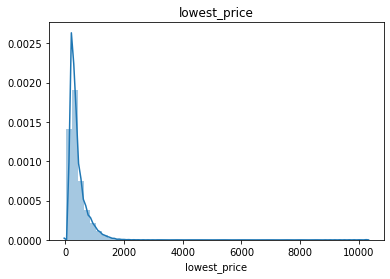

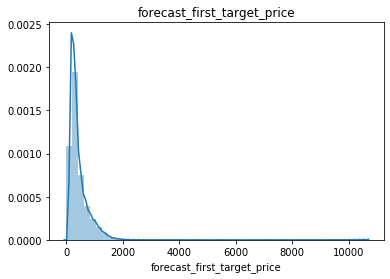

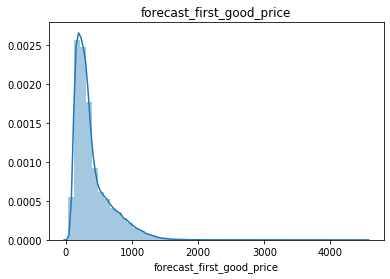

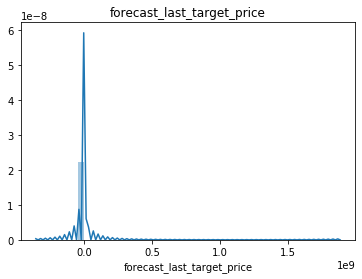

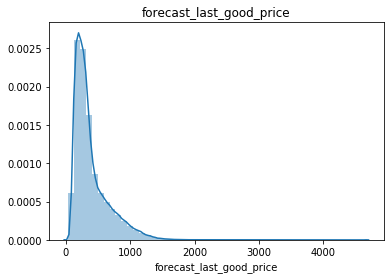

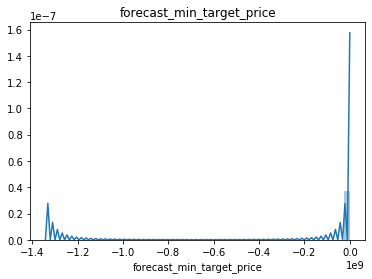

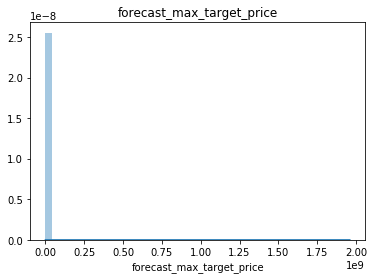

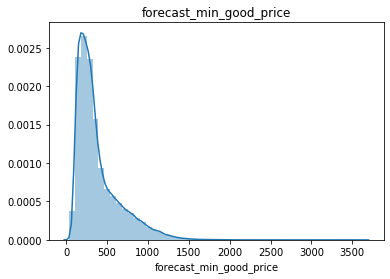

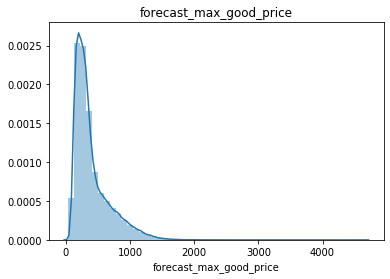

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


list_prices = ['lowest_price', 'forecast_first_target_price', \
'forecast_first_good_price', 'forecast_last_target_price',   \
'forecast_last_good_price',   \
'forecast_min_target_price','forecast_max_target_price',   \
'forecast_min_good_price', 'forecast_max_good_price']

for col in list_prices:
    
  
    plt.title(col)
    sns.distplot(prices[col])
    plt.show()


# without knowing much about context, can see that relevant fields are
# 'lowest_price', 'forecast_first_good_price', 'forecast_last_target_price',   \
# 'forecast_last_good_price', 'forecast_min_good_price', 'forecast_max_good_price']]

### feature engineering

We normalize and scale prices to ensure algorithm treats them evenly

In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np



prices_selected = prices[['lowest_price', 'forecast_first_good_price',   \
'forecast_last_good_price', 'forecast_min_good_price', 'forecast_max_good_price']]

prices_normalized = prices[['lowest_price', 'forecast_first_good_price',   \
'forecast_last_good_price', 'forecast_min_good_price', 'forecast_max_good_price']]

# unskew variables
for col in prices_normalized.columns:
    prices_normalized[col] = np.log(prices_normalized[col])
    
# import scaling library 
scaler = StandardScaler()

#fit the scaler
scaler.fit(prices_normalized)

# transform
prices_normalized_scaled = scaler.transform(prices_normalized)

#reset index and col names
prices_normalized_scaled_reset = pd.DataFrame(prices_normalized_scaled, \
                                index=prices_normalized.index, \
                                columns=prices_normalized.columns)

prices_normalized_scaled_reset.head()

/Users/Don/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


lowest_price  forecast_first_good_price  forecast_last_good_price  forecast_min_good_price  forecast_max_good_price
0      0.286999                   0.328487                  0.338921                 0.365573                 0.305040
1     -0.271685                  -0.245674                 -0.234070                -0.205701                -0.270571
2      0.132336                   0.093117                  0.111150                 0.133785                 0.073776
3      0.553407                  -0.931296                 -0.923165                -0.892732                -0.957926
4      0.992091                   0.125657                  0.162102                 0.166393                 0.124599

### model

use Kmeans to get clusters

In [23]:
from sklearn.cluster import KMeans


# set the model
kmeans = KMeans(n_clusters=8, random_state=1)

# fit the model 
kmeans.fit(prices_normalized_scaled_reset)

cluster_labels = kmeans.labels_

# #what is assignment
prices_normalized_scaled_reset_labelled = prices_normalized_scaled_reset.assign(Cluster = cluster_labels)
#prices_normalized_scaled_reset_labelled.head()

prices_normalized_scaled_reset_labelled_original = prices_selected.assign(Cluster = cluster_labels)
prices_normalized_scaled_reset_labelled_original.head()


lowest_price  forecast_first_good_price  forecast_last_good_price  forecast_min_good_price  forecast_max_good_price  Cluster
0         392.0                      394.0                     393.0                    393.0                    394.0        6
1         274.0                      275.0                     275.0                    275.0                    275.0        3
2         355.0                      340.0                     341.0                    340.0                    341.0        6
3         465.0                      179.0                     179.0                    179.0                    179.0        4
4         616.0                      347.0                     352.0                    347.0                    352.0        6

The clusters are below. An average price vlue of each feature per cluster is in the table

In [24]:
# we can see the clusters
prices_normalized_scaled_reset_labelled_original.groupby(['Cluster']).agg({   \
'lowest_price': 'mean',  \
'forecast_first_good_price': 'mean',  \
'forecast_last_good_price': 'mean',  \
'forecast_min_good_price': 'mean',  \
'forecast_max_good_price': ['mean', 'count'],}).round(0)


lowest_price forecast_first_good_price forecast_last_good_price forecast_min_good_price forecast_max_good_price       
                mean                      mean                     mean                    mean                    mean  count
Cluster                                                                                                                       
0              170.0                     158.0                    158.0                   154.0                   162.0  23904
1              529.0                     524.0                    518.0                   510.0                   531.0  22250
2             1147.0                    1122.0                   1110.0                  1087.0                  1143.0  12078
3              289.0                     283.0                    281.0                   277.0                   287.0  34706
4              229.0                     213.0                    212.0                   208.0                   217.0  30504
5              122.0                     112.0                    111.0                   109.0                   115.0  11858
6              389.0                     371.0                    368.0                   364.0                   376.0  29976
7              750.0                     754.0                    744.0                   732.0                   766.0  19872

Using elbow method to select optimal number of clusters (to be used in final pipeline)

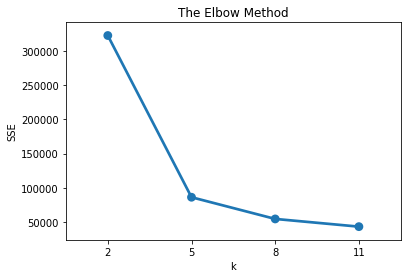

In [25]:
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(2,14,3):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(prices_normalized_scaled_reset)
    sse[k] = kmeans.inertia_ 


# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [26]:
# look at variable importance to each cluster
cluster_avg = prices_normalized_scaled_reset_labelled_original.groupby(['Cluster']).mean()
population_avg = prices_selected.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

lowest_price  forecast_first_good_price  forecast_last_good_price  forecast_min_good_price  forecast_max_good_price
Cluster                                                                                                                     
0               -0.58                      -0.60                     -0.60                    -0.60                    -0.60
1                0.31                       0.33                      0.33                     0.33                     0.33
2                1.84                       1.85                      1.85                     1.84                     1.86
3               -0.28                      -0.28                     -0.28                    -0.28                    -0.28
4               -0.43                      -0.46                     -0.46                    -0.46                    -0.46
5               -0.70                      -0.71                     -0.71                    -0.72                    -0.71
6               -0.04                      -0.06                     -0.05                    -0.05                    -0.06
7                0.86                       0.92                      0.91                     0.91                     0.92

# In the other jupyter notebook file you will find a pipeline that implements everything we explored in this notebook as one reusable autoamtic pipeline that runs in 1 click

